In [3]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from src.wine_classifier.load_wine_data import load_wine_data

In [4]:
X, y, feature_names, target_names = load_wine_data(as_frame=True)
print(X.head())
print(X.shape)
print(y.value_counts())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])

decision_tree_pipeline = Pipeline([('classifier', DecisionTreeClassifier())])

models = {
    "Logistic Regression": logreg_pipeline,
    "SVM": svm_pipeline,
    "KNN": knn_pipeline,
    "Random Forest": rf_pipeline,
    "Decision Tree": decision_tree_pipeline
}

In [25]:
from src.wine_classifier.model_evaluation import evaluate_model

In [26]:
results = {}

for names, model in models.items():
    model = model.fit(X_train, y_train)
    results[names] = evaluate_model(model, X_test, y_test)

In [27]:
print(pd.DataFrame(results).T[['accuracy', 'f1']])

                     accuracy        f1
Logistic Regression       1.0       1.0
SVM                       1.0       1.0
KNN                  0.944444  0.943604
Random Forest             1.0       1.0
Decision Tree        0.944444  0.943997


[Plot of model comparison]

⬇️
### Model Selection Policy
(Your markdown text)


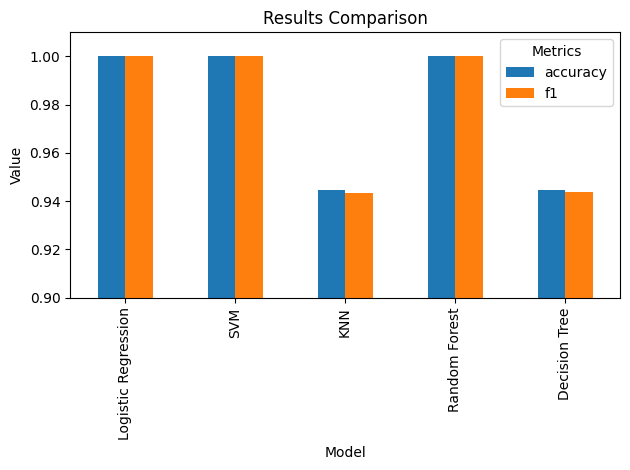

In [28]:
import matplotlib.pyplot as plt

bar_chart = pd.DataFrame(results).T[['accuracy', 'f1']]

bar_chart.plot(kind='bar')

plt.title('Results Comparison')
plt.xlabel('Model')
plt.ylabel('Value')
plt.ylim(0.9, 1.01)
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('../reports/figures/model_scores.png', dpi=150)
plt.show()

**Observation:**
All top three models (Logistic Regression, SVM, and Random Forest) achieved perfect test accuracy and F1 scores.
KNN and Decision Tree performed slightly lower (~0.94 F1).
For deployment and CI/CD use, Logistic Regression was selected for its simplicity, determinism, and speed.

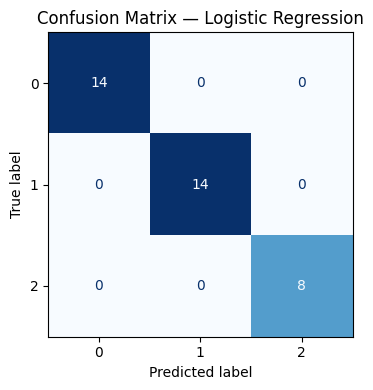

In [29]:

best_name = "Logistic Regression"

best_cm = results[best_name]["confusion_matrix"]

fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix = best_cm)
disp.plot(cmap="Blues", ax=ax, colorbar=False)
ax.set_title(f"Confusion Matrix — {best_name}")
fig.tight_layout()
fig.savefig("../reports/figures/confusion_best.png", dpi=150)
plt.show()

**Confusion Matrix — Interpretation**

- The matrix is perfectly diagonal (no off-diagonal counts), confirming **zero misclassifications** on the test set.
- Class supports appear as 14, 14, and 8, indicating class 2 has fewer test samples—consistent with a stratified split.
- This aligns with the test F1 = 1.00 for Logistic Regression.

**Why this matters (engineering view):**
- Confirms the model’s behavior per class, not just aggregate metrics.
- Provides visual proof for stakeholders and for CI reports.
- Justifies selecting Logistic Regression as the deployment model (simple, fast, deterministic) among ties.
